In [1]:
from matplotlib import pyplot as plt
import requests
import pandas as pd
from pprint import pprint
import re

movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "38565ed214msh308e11f3b916074p16b6fcjsn9b77ef6aeb70",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()
    
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        print(title)

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"Title": title,
                        "Year": year,
                        "Runtime": runtime,
                        "Box Office": box_office,
                        "IMDb": imdb,
                        "Rotten Tomatoes": rotten_tomatoes,
                        "Metacritic": metacritic,
                        "Nominations": noms,
                        "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Casino Royale
The Prestige
21 Jump Street
Django Unchained
The Wolf of Wall Street
Love Actually
The Terminal
Scott Pilgrim vs. the World
Edge of Tomorrow
The Perfect Holiday
Finding Nemo
Iron Man
Ghost in the Shell
Mission: Impossible III
Harry Potter and the Order of the Phoenix
Fracture
The Fountain
Pirates of the Caribbean: The Curse of the Black Pearl
Indiana Jones and the Kingdom of the Crystal Skull
Live Free or Die Hard
Iron Man
The Prestige
Harry Potter and the Half-Blood Prince
The Pianist
The Terminal
I Am Legend
Man on Fire
Pirates of the Caribbean: Dead Man's Chest
Elizabeth: The Golden Age
Sin City: A Dame to Kill For
Eternal Sunshine of the Spotless Mind
Hulk
The Pianist
The Terminal
Harry Potter and the Half-Blood Prince
Iron Man
The Prestige
Mystic River
Finding Nemo
National Treasure: Book of Secrets
Donnie Darko
Batman Begins
Ocean's Thirteen
Pirates of the Caribbean: The Curse of the Black Pearl
Catch Me If You Can
The 40-Year-Old Virgin
I Am Legend
District B13
Har

,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [2]:
movie_data_df.count()

Title              194
Year               194
Runtime            194
Box Office         194
IMDb               194
Rotten Tomatoes    194
Metacritic         194
Nominations        194
Wins               194
dtype: int64

In [3]:
movie_data_df

,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37
...,...,...,...,...,...,...,...,...,...
189,Harry Potter and the Sorcerer's Stone,2001,152,318886962.0,76,81,65,69,19
190,Batman Begins,2005,140,206863479.0,82,84,70,79,14
191,The Terminal,2004,128,77872883.0,74,61,55,8,7
192,Sunshine,2007,107,3675753.0,72,76,64,23,1


# Analysis of Review Sites

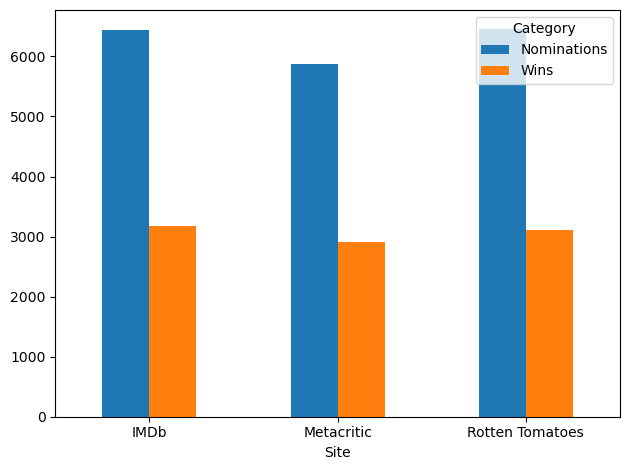

In [4]:
reviews_bar_data = movie_data_df[["IMDb", "Rotten Tomatoes", "Metacritic"]].mean()
review_sites = ["IMDb", "Rotten Tomatoes", "Metacritic"]
noms_wins = []

for site in review_sites:
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > reviews_bar_data[site], "Nominations"].sum())
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > reviews_bar_data[site], "Wins"].sum())

labels = ["IMDb", "IMDb", "Rotten Tomatoes", "Rotten Tomatoes", "Metacritic", "Metacritic"]
cond = ["Nominations", "Wins", "Nominations", "Wins", "Nominations", "Wins"]

bar_df = pd.DataFrame({"Site": labels, "Category": cond, "Values": noms_wins})
bar_df.pivot(index='Site', columns='Category', values='Values').plot(kind='bar', rot=0)
plt.tight_layout()
plt.show()

# Analysis of Movie Length

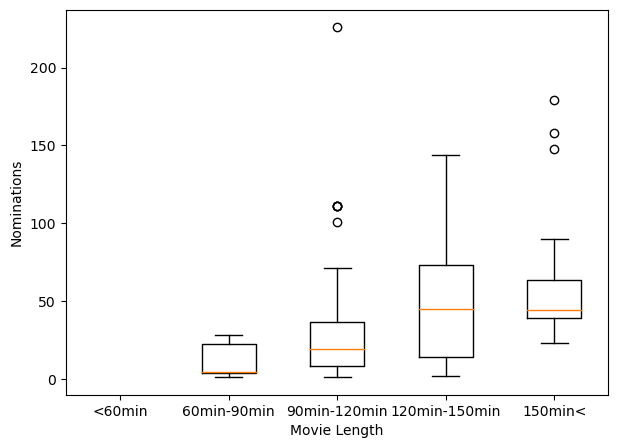

In [5]:
movie_lengths = [0, 60, 90, 120, 150]
length_labels = ["<60min", "60min-90min", "90min-120min", "120min-150min", "150min<"]
length_noms_data = []
length_wins_data = []
i = 0

for i in range(len(movie_lengths)):
    if i == (len(movie_lengths) - 1):
        length_noms_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Nominations"])
        length_wins_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Wins"])
    else:
        temp = movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i]]
        length_noms_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Nominations"])
        length_wins_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Wins"])
    i += 1

plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_noms_data, labels=length_labels)
plt.xlabel("Movie Length")
plt.ylabel("Nominations")
plt.show()

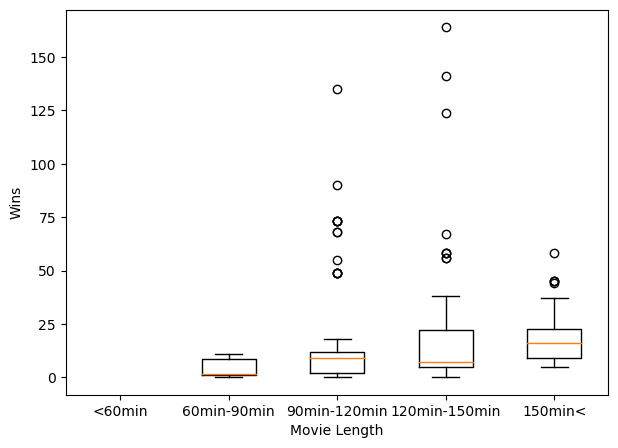

In [6]:
plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_wins_data, labels=length_labels)
plt.xlabel("Movie Length")
plt.ylabel("Wins")
plt.show()